In [1]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers 
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [36]:
unemployment = pd.read_csv(r"C:\Users\legion\OneDrive\Documents\Data Analytic\unemployment.csv")
unemployment.head()

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CMA) Average Hourly Wage Rate ($),City of Calgary Building Permits Residential Value ($),City of Calgary Building Permits Non-Residential Value ($),Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Calgary (CMA) Inflation Rate (%change)
0,2024-03,0.06,0.06,0.06,37.17,"1,199,424,535.47","568,063,465.48","4,354","5,385",NaN,0.05
1,2022-08,0.06,0.06,0.06,35.51,"2,806,818,863.98","1,211,523,912.51","9,546","11,186",26.84,0.07
2,2022-09,0.06,0.06,0.06,35.54,"3,093,935,845.24","1,464,589,773.02","10,938","12,865",30.32,0.07
3,2022-10,0.06,0.06,0.05,35.64,"3,427,435,541.85","1,546,904,050.13","12,365","14,553",33.87,0.07
4,2022-11,0.06,0.06,0.05,35.75,"3,725,734,013.69","1,628,045,619.91","13,866","16,226",37.43,0.07


In [37]:
#  Calgary CER Unemployment rate, Alberta Unemployment Rate and Canada Unemployment rate the analysis are together
#  City of calgary Building Permits Residential Value and City of Calgary Building Permits Non-Residential Value the anysis are together
#  Calgary/CMA) Average Hourly Wage Rate($) and Calgary(City) Total Housing Starts(units) the analysis are together 

In [38]:
Unemployment_rate = unemployment[["Date","Calgary CER Unemployment rate (%)", "Alberta Unemployment Rate (%)", 'Canada Unemployment rate (%)']]
Unemployment_rate.head()

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%)
0,2024-03,0.06,0.06,0.06
1,2022-08,0.06,0.06,0.06
2,2022-09,0.06,0.06,0.06
3,2022-10,0.06,0.06,0.05
4,2022-11,0.06,0.06,0.05


In [39]:
Unemployment_rate["Date"]

0     2024-03
1     2022-08
2     2022-09
3     2022-10
4     2022-11
5     2022-12
6     2023-01
7     2023-02
8     2023-03
9     2023-04
10    2023-05
11    2023-06
12    2023-07
13    2023-08
14    2023-09
15    2023-10
16    2023-11
17    2023-12
18    2024-01
19    2024-02
20    2020-01
21    2020-02
22    2020-03
23    2020-04
24    2020-05
25    2020-06
26    2020-07
27    2020-08
28    2020-09
29    2020-10
30    2020-11
31    2020-12
32    2021-01
33    2021-02
34    2021-03
35    2021-04
36    2021-05
37    2021-06
38    2021-07
39    2021-08
40    2021-09
41    2021-10
42    2021-11
43    2021-12
44    2022-01
45    2022-02
46    2022-03
47    2022-04
48    2022-05
49    2022-06
50    2022-07
Name: Date, dtype: object

In [40]:
Unemployment_rate.dtypes

Date                                  object
Calgary CER Unemployment rate (%)    float64
Alberta Unemployment Rate (%)        float64
Canada Unemployment rate (%)         float64
dtype: object

In [41]:
def date_time(df):
    df["date"] = pd.to_datetime(df["Date"], errors = "coerce")
    return df["date"]

In [42]:
date_time(Unemployment_rate)

C:\Users\legion\AppData\Local\Temp\ipykernel_9356\4161995668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["Date"], errors = "coerce")


0    2024-03-01
1    2022-08-01
2    2022-09-01
3    2022-10-01
4    2022-11-01
5    2022-12-01
6    2023-01-01
7    2023-02-01
8    2023-03-01
9    2023-04-01
10   2023-05-01
11   2023-06-01
12   2023-07-01
13   2023-08-01
14   2023-09-01
15   2023-10-01
16   2023-11-01
17   2023-12-01
18   2024-01-01
19   2024-02-01
20   2020-01-01
21   2020-02-01
22   2020-03-01
23   2020-04-01
24   2020-05-01
25   2020-06-01
26   2020-07-01
27   2020-08-01
28   2020-09-01
29   2020-10-01
30   2020-11-01
31   2020-12-01
32   2021-01-01
33   2021-02-01
34   2021-03-01
35   2021-04-01
36   2021-05-01
37   2021-06-01
38   2021-07-01
39   2021-08-01
40   2021-09-01
41   2021-10-01
42   2021-11-01
43   2021-12-01
44   2022-01-01
45   2022-02-01
46   2022-03-01
47   2022-04-01
48   2022-05-01
49   2022-06-01
50   2022-07-01
Name: date, dtype: datetime64[ns]

In [43]:
Unemployment_rate.index = Unemployment_rate.pop("date")
Unemployment_rate

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%)
date,,,,
2024-03-01,2024-03,0.06,0.06,0.06
2022-08-01,2022-08,0.06,0.06,0.06
2022-09-01,2022-09,0.06,0.06,0.06
2022-10-01,2022-10,0.06,0.06,0.05
2022-11-01,2022-11,0.06,0.06,0.05
2022-12-01,2022-12,0.06,0.06,0.05
2023-01-01,2023-01,0.06,0.06,0.05
2023-02-01,2023-02,0.07,0.06,0.05
2023-03-01,2023-03,0.07,0.06,0.05


In [44]:
Unemployment_rate.drop(columns = "Date", inplace = True)

C:\Users\legion\AppData\Local\Temp\ipykernel_9356\83774991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_rate.drop(columns = "Date", inplace = True)


<Axes: xlabel='date', ylabel='Calgary CER Unemployment rate (%)'>

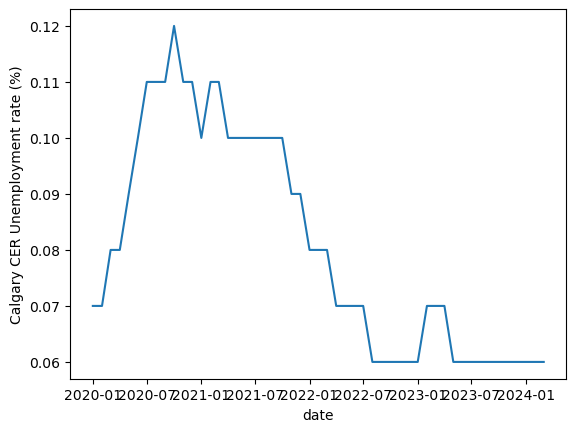

In [45]:
import seaborn as sns

sns.lineplot(data = Unemployment_rate, x=Unemployment_rate.index, y= Unemployment_rate["Calgary CER Unemployment rate (%)"])

In [46]:
def date_time(date_str):
    return pd.to_datetime(date_str, errors = "coerce")
def df_to_order( f_date_str, l_date_str):
    f_date_str = date_time(f_date_str)
    l_date_str = date_time(l_date_str)
    target_date = f_date_str
    return f_date_str, l_date_str, target_date
def target_dates(dataframe, target_date, last_date, n=3):
    dates = []
    x_values, y_values = [], []
    
    while target_date <= last_date:
        df_subset = dataframe[dataframe["Date"] >= target_date]
        df_subset = df_subset.head(n+1)
        
        if len(df_subset) != n + 1:
            print(f"Warning: Insufficient data for target date {target_date}. Skipping.")
            target_date += datetime.timedelta(days=7)  # Skip to the next target date
            continue
        
        values = df_subset["Calgary CER Unemployment rate (%)"].to_numpy()
        x_values.append(values[:-1])
        y_values.append(values[-1])
        dates.append(target_date)
        
        target_date += datetime.timedelta(days=7)  # Update target for next iteration
    
    ret_df = pd.DataFrame({})
    ret_df["Target Date"] = dates
    for i in range(n):
        ret_df[f"Target-{n-i}"] = [x[i] for x in x_values]
    ret_df["Target"] = y_values
    return ret_df

# Sample DataFrame
date_range = pd.date_range(start="2020-01-01", end="2024-03-01", freq="D")
Unemployment_rates = np.random.rand(len(date_range)) * 100
data = {
    "Date": date_range,
    "Calgary CER Unemployment rate (%)": Unemployment_rates
}
df = pd.DataFrame(data)

# Define the start and end date strings
f_date_str = "2020-01-01"
l_date_str = "2024-03-01"

f_date, l_date, target_date = df_to_order(f_date_str, l_date_str)
result_df = target_dates(df, target_date, l_date)

print(result_df)

    Target Date   Target-3   Target-2   Target-1     Target
0    2020-01-01  64.351539  14.475314  72.690308  64.263560
1    2020-01-08  17.560277  73.243738  80.181364  75.073816
2    2020-01-15  74.410666  93.418158  43.251292   9.657937
3    2020-01-22  95.870212  99.558246  51.117492   7.903604
4    2020-01-29  71.186558   8.413391  96.911414  74.747351
..          ...        ...        ...        ...        ...
212  2024-01-24  22.700758   8.520111  65.332826  43.883411
213  2024-01-31  11.829218  58.539751  85.796650  19.359983
214  2024-02-07  35.250398   6.890862  27.198416  34.805472
215  2024-02-14  83.597924  40.627999  77.443050  32.202349
216  2024-02-21  59.646653  87.463316   9.439037  83.991278

[217 rows x 5 columns]


In [47]:
def values_to_date(values_dataframe):
    df_as_np = values_dataframe.to_numpy()
    date = df_as_np[:,0]
    middle_matrix = df_as_np[:, 1:-1]
    x = middle_matrix.reshape((len(date), middle_matrix.shape[1],1))
    y = df_as_np[:,-1]
    return date, x.astype(np.float32), y.astype(np.float32)
date,x,y = values_to_date(result_df)
date.shape, x.shape, y.shape

((217,), (217, 3, 1), (217,))

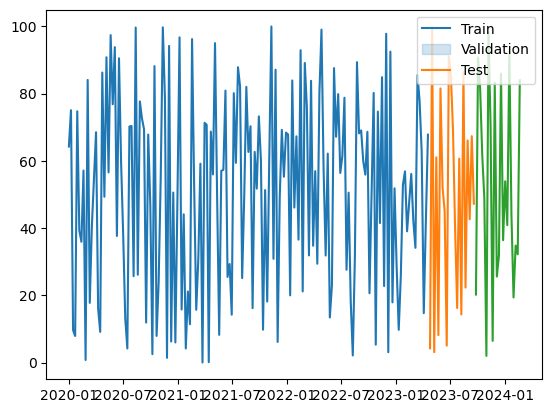

In [48]:
import matplotlib.pyplot as plt

D_80 = int(len(date)* .8)
D_90 = int(len(date)* .9)

dates_train, x_train, y_train = date[:D_80], x[:D_80], y[:D_80]
dates_val, x_val, y_val = date[D_80:D_90], x[D_80:D_90], y[D_80:D_90]
dates_test, x_test, y_test = date[D_90:], x[D_90:], y[D_90:]
sns.lineplot(x = dates_train, y = y_train, label = "Train" )
sns.lineplot(x = dates_val, y = y_val, label = "Validation")
sns.lineplot(x = dates_test, y = y_test, label = "Test")
plt.legend(labels= ["Train","Validation","Test"], loc = "upper right")
plt.show()


In [49]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(128, return_sequences = True),
                    layers.BatchNormalization(),
                    layers.Dropout(0.2),
                    layers.LSTM(64),
                    layers.Dense(64, activation = "relu"),
                    layers.Dropout(0.2),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(1)])

model.compile(loss = "mse", optimizer = Adam(learning_rate= 0.001),
              metrics = ["mean_absolute_error"])
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs= 100, batch_size = 32)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 3422.3940 - mean_absolute_error: 50.9475 - val_loss: 3267.2141 - val_mean_absolute_error: 48.4234
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3220.3196 - mean_absolute_error: 49.5627 - val_loss: 3232.9670 - val_mean_absolute_error: 48.0701
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3139.6514 - mean_absolute_error: 48.0222 - val_loss: 3175.4250 - val_mean_absolute_error: 47.4652
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3351.8193 - mean_absolute_error: 50.7552 - val_loss: 3069.7693 - val_mean_absolute_error: 46.3503
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2940.4978 - mean_absolute_error: 46.6812 - val_loss: 2878.8523 - val_mean_absolute_error: 44.4362
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2687.9849 - mean_absolute_error: 43.8816 - val_loss: 2548.6987 - val_mean_absolute_error: 41.5184
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2043.5022 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


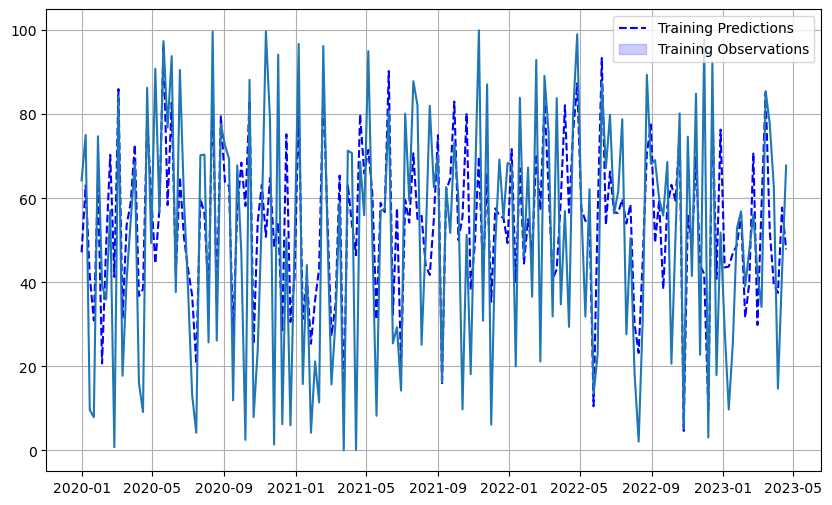

In [62]:
train_predictions = model.predict(x_train).flatten()

plt.figure(figsize=(10,6))
sns.lineplot(x = dates_train, y = train_predictions, color = "blue", label = "Training Prediction", linestyle = "--")
sns.lineplot(x = dates_train, y =  y_train, label = "Training Observations", markers = "o")
plt.legend(["Training Predictions", "Training Observations"])
plt.grid(True)
plt.show()

In [52]:
train_predictions = model.predict(x_train).flatten()

# Create a DataFrame to display the values
df = pd.DataFrame({'Date': dates_train, 'Training Predictions': train_predictions, 'Training Observations': y_train})

# Print the DataFrame
print(df)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
          Date  Training Predictions  Training Observations
0   2020-01-01             47.147129              64.263557
1   2020-01-08             63.066708              75.073814
2   2020-01-15             41.499630               9.657937
3   2020-01-22             30.897072               7.903604
4   2020-01-29             63.734600              74.747353
..         ...                   ...                    ...
168 2023-03-22             52.353252              77.751251
169 2023-03-29             39.494202              62.698380
170 2023-04-05             37.491379              14.698084
171 2023-04-12             57.762360              42.236214
172 2023-04-19             47.819717              67.798531

[173 rows x 3 columns]


In [55]:
threshold = 5
df["Absolute_Difference"] = abs(df["Training Predictions"] - df["Training Observations"])
discrepancy_df = df[df["Absolute_Difference"] > threshold]
discrepancy_df

,Date,Training Predictions,Training Observations,Absolute_Difference
0,2020-01-01,47.147129,64.263557,17.116428
1,2020-01-08,63.066708,75.073814,12.007107
2,2020-01-15,41.499630,9.657937,31.841694
3,2020-01-22,30.897072,7.903604,22.993469
4,2020-01-29,63.734600,74.747353,11.012753
...,...,...,...,...
168,2023-03-22,52.353252,77.751251,25.397999
169,2023-03-29,39.494202,62.698380,23.204178
170,2023-04-05,37.491379,14.698084,22.793295
171,2023-04-12,57.762360,42.236214,15.526146


In [56]:
discrepancy_df_sorted = df.sort_values(by="Absolute_Difference", ascending = True)

In [57]:
vic = discrepancy_df_sorted
vic = vic[discrepancy_df_sorted["Absolute_Difference"]>5]
vic

,Date,Training Predictions,Training Observations,Absolute_Difference
80,2021-07-14,54.198708,59.421867,5.223160
84,2021-08-11,44.099190,49.547581,5.448391
78,2021-06-30,19.884554,14.240216,5.644338
127,2022-06-08,93.380959,87.594177,5.786781
63,2021-03-17,65.392616,59.154350,6.238266
...,...,...,...,...
18,2020-05-06,44.449390,90.824242,46.374851
47,2020-11-25,48.669697,1.408778,47.260918
45,2020-11-11,50.818600,99.721039,48.902439
40,2020-10-07,58.153732,2.503447,55.650284


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


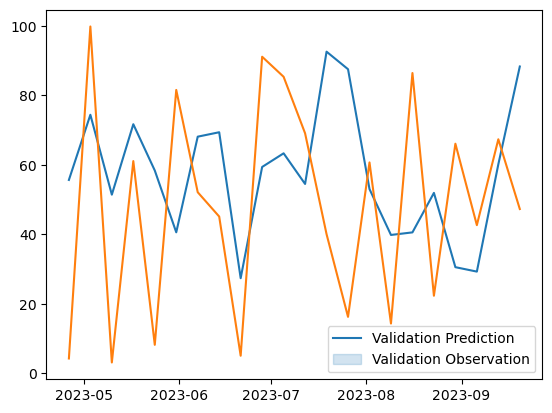

In [58]:
val_predictions = model.predict(x_val).flatten()

sns.lineplot(x = dates_val, y = val_predictions)    
sns.lineplot(x = dates_val, y = y_val)
plt.legend(["Validation Prediction", "Validation Observation"])

In [65]:
val_predictions = model.predict(x_val).flatten()

# Create a DataFrame to display the values
df = pd.DataFrame({'Date': dates_val, 'Val Predictions': val_predictions, 'val Observations': y_val})

# Print the DataFrame
print(df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
         Date  Val Predictions  val Observations
0  2023-04-26        55.637394          4.246092
1  2023-05-03        74.392189         99.808197
2  2023-05-10        51.401340          3.097624
3  2023-05-17        71.674423         61.061787
4  2023-05-24        58.357357          8.179513
5  2023-05-31        40.562542         81.541100
6  2023-06-07        68.089989         52.099419
7  2023-06-14        69.365425         45.102486
8  2023-06-21        27.357395          5.039171
9  2023-06-28        59.371143         91.099258
10 2023-07-05        63.299366         85.328117
11 2023-07-12        54.483814         69.061737
12 2023-07-19        92.558678         40.031181
13 2023-07-26        87.508301         16.226328
14 2023-08-02        53.011272         60.675331
15 2023-08-09        39.804203         14.306639
16 2023-08-16        40.543095         86.407776
17 2023-08-23        51.911995         22.308578
18 2023-08-30        30.531006 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


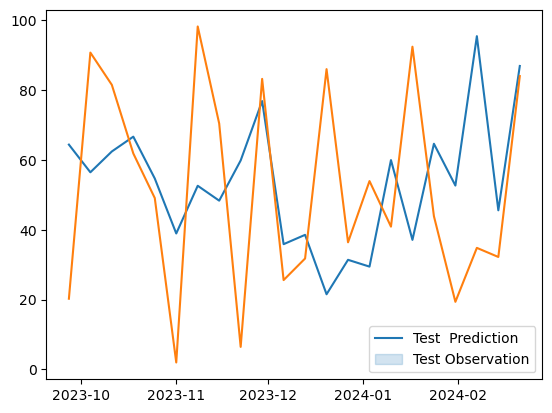

In [66]:
test_predictions = model.predict(x_test).flatten()

sns.lineplot(x = dates_test, y = test_predictions)
sns.lineplot(x = dates_test, y = y_test)
plt.legend(["Test  Prediction", "Test Observation"])

In [68]:
df = pd.DataFrame({"Date":dates_val, "Test Prediction": test_predictions, "Test Observation": y_test })
df

,Date,Test Prediction,Test Observation
0,2023-04-26,64.373749,20.248169
1,2023-05-03,56.446957,90.723022
2,2023-05-10,62.409374,81.480949
3,2023-05-17,66.647148,61.839264
4,2023-05-24,54.673981,49.070175
5,2023-05-31,38.930176,1.992554
6,2023-06-07,52.588310,98.197144
7,2023-06-14,48.325592,70.400932
8,2023-06-21,59.832413,6.453615
9,2023-06-28,76.849358,83.195023


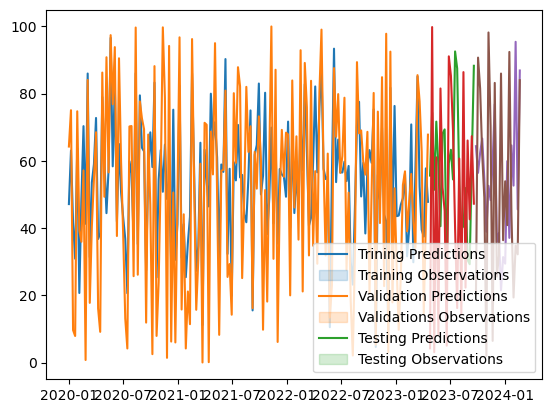

In [60]:
sns.lineplot(x = dates_train, y =train_predictions)
sns.lineplot(x = dates_train, y = y_train)
sns.lineplot(x = dates_val, y = val_predictions)
sns.lineplot(x = dates_val, y = y_val)
sns.lineplot(x = dates_test, y = test_predictions)
sns.lineplot(x = dates_test, y = y_test)
plt.legend(["Trining Predictions", "Training Observations", "Validation Predictions", "Validations Observations", "Testing Predictions", "Testing Observations"])